<a href="https://colab.research.google.com/github/omkarkd/Trimester-4/blob/master/Assignment_Mushroom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


In [2]:
data = pd.read_csv(r'/content/agaricus-lepiota.csv',names=['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'])

In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

As Specified in the Description file of the dataset which contains '?' are to be considered as null objects

In [6]:
for d in data.columns:
  data[d] = data[d].apply(lambda x:x if x != '?' else np.nan) 

In [7]:
for d in data.columns:
  data[d] = data[d].astype('category')

In [8]:
data.isnull().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [9]:
data.shape

(8124, 23)

In [10]:
for col in data.columns:
  data[col] = data[col].cat.codes

In [11]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,2,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,1,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,1,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,2,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,2,2,2,7,7,0,2,1,0,3,0,1


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


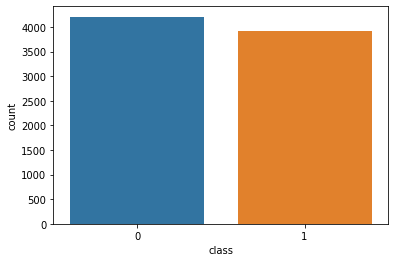

In [13]:
sns.countplot(data['class'],data=data)

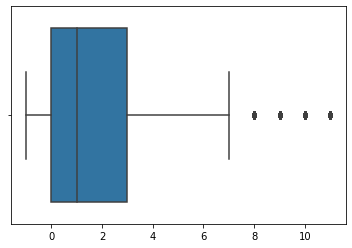

In [14]:
sns.boxplot(data)

In [15]:
X = data.iloc[:,1:]
Y = data['class']

In [16]:
print(X.head())
print(Y.head())

   cap-shape  cap-surface  cap-color  ...  spore-print-color  population  habitat
0          5            2          4  ...                  2           3        5
1          5            2          9  ...                  3           2        1
2          0            2          8  ...                  3           2        3
3          5            3          8  ...                  2           3        5
4          5            2          3  ...                  3           0        1

[5 rows x 22 columns]
0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int8


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neural_network import MLPClassifier


In [18]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=True)

In [19]:
model = Perceptron()

In [20]:
model.fit(x_train,y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

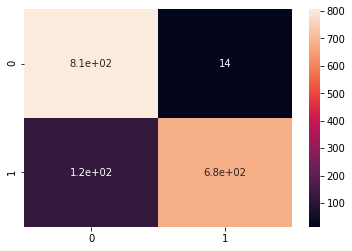

In [21]:
sns.heatmap(confusion_matrix(y_test,model.predict(x_test)),annot=True)

In [22]:
accuracy_score(y_test,model.predict(x_test))

0.9144615384615384

In [23]:
model = MLPClassifier(solver='sgd')



In [24]:
model.fit(x_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

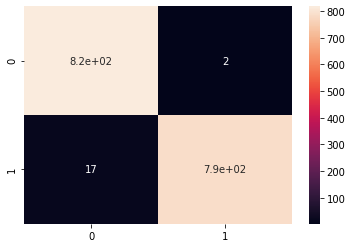

array([[818,   2],
       [ 17, 788]])

In [25]:
sns.heatmap(confusion_matrix(y_test, model.predict(x_test)), annot=True)
plt.show()
confusion_matrix(y_test, model.predict(x_test))


In [26]:
accuracy_score(y_test,model.predict(x_test))

0.9883076923076923

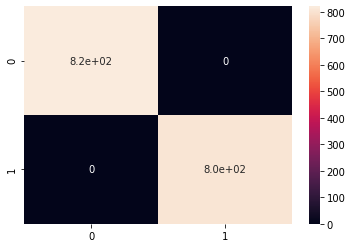

Accuracy Score 1.0


In [27]:
model = MLPClassifier(solver='adam')
model.fit(x_train, y_train)
sns.heatmap(confusion_matrix(y_test, model.predict(x_test)), annot=True)
plt.show()
confusion_matrix(y_test, model.predict(x_test))
print("Accuracy Score",accuracy_score(y_test,model.predict(x_test)))


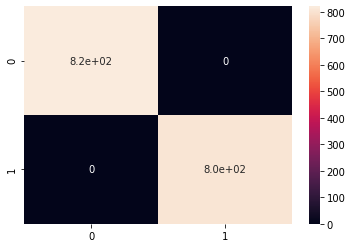

Accuracy score 1.0


In [28]:
model = MLPClassifier(solver='lbfgs')
model.fit(x_train, y_train)
sns.heatmap(confusion_matrix(y_test, model.predict(x_test)), annot=True)
plt.show()
confusion_matrix(y_test, model.predict(x_test))
print("Accuracy score",accuracy_score(y_test,model.predict(x_test)))


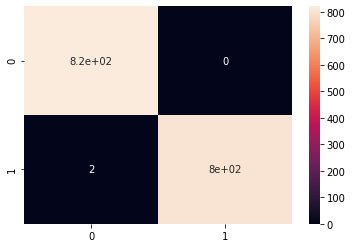

Accuracy Score 0.9987692307692307


In [29]:
model = MLPClassifier(hidden_layer_sizes=(50,25,50), solver='sgd')
model.fit(x_train, y_train)
sns.heatmap(confusion_matrix(y_test, model.predict(x_test)), annot=True)
plt.show()
confusion_matrix(y_test, model.predict(x_test))
print("Accuracy Score",accuracy_score(y_test,model.predict(x_test)))